# Tarea 3 Aprendizaje Estadístico No Supervisado

## Paso 1

#### Cargar datos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
datos = pd.read_csv('../actividad/dynamic_pricing.csv')

#### Verificar información de los datos

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [8]:
datos.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


#### Verificar la media de las variables numéricas

In [10]:
if datos.select_dtypes(include=[np.number]).shape[1] > 0: 
    media_datos = datos.select_dtypes(include=[np.number]).mean(axis=0) 
    print(media_datos)

Number_of_Riders            60.372000
Number_of_Drivers           27.076000
Number_of_Past_Rides        50.031000
Average_Ratings              4.257220
Expected_Ride_Duration      99.588000
Historical_Cost_of_Ride    372.502623
dtype: float64


#### Verificar la varianza de las variables numéricas
La varianza es una medida estadística que indica el grado de dispersión de los datos en relación a su media. La varianza nos dice qué tan lejos están los valores de un conjunto de datos de la media del conjunto. Es una medida fundamental en la estadística porque ayuda a entender la variabilidad dentro de los datos.  
La fórmula de la varianza para una muestra es: $$ \sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$ donde:  
$ \sigma^2 =$ es la varianza.  
$x_i =$ es cada valor individual del conjunto de datos.  
$\bar{x} = $ es la media del conjunto de datos.  
n es el número de datos.  
La varianza es fundamental para muchas otras medidas estadísticas, como la desviación estándar, que es simplemente la raíz cuadrada de la varianza y proporciona una medida de dispersión en las mismas unidades que los datos originales.

In [12]:
if datos.select_dtypes(include=[np.number]).shape[1] > 0: 
    media_datos = datos.select_dtypes(include=[np.number]).var(axis=0) 
    print(media_datos)

Number_of_Riders             561.761377
Number_of_Drivers            363.601826
Number_of_Past_Rides         859.297336
Average_Ratings                0.189905
Expected_Ride_Duration      2417.241497
Historical_Cost_of_Ride    35028.400030
dtype: float64


#### Nota
Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable  que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.

#### Separar variables numéricas y categóricas

In [15]:
# Obtener los nombres de las variables numéricas
numericas = datos.select_dtypes(include=['float64', 'int64']).columns
numericas

Index(['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
       'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride'],
      dtype='object')

In [16]:
# Obtener los nombres de las variables categóricas
categoricas = datos.select_dtypes(include=['object', 'category']).columns
categoricas

Index(['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking',
       'Vehicle_Type'],
      dtype='object')

#### Estandarizar las variables numéricas

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Crear un objeto de tipo Scaler
scaler = StandardScaler()

In [20]:
# Transformar los datos
datos[numericas] = scaler.fit_transform(datos[numericas])

In [21]:
datos

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,1.250673,0.940457,Urban,Silver,-1.263895,0.488517,Night,Premium,-0.195113,-0.471736
1,-0.100128,0.625642,Suburban,Silver,0.749818,-0.452793,Evening,Economy,-1.151547,-1.061811
2,-0.775528,0.205889,Rural,Silver,-1.707594,-0.613505,Afternoon,Premium,-0.480008,-0.228301
3,1.208460,0.048482,Rural,Regular,0.579164,0.121177,Afternoon,Premium,0.700273,0.522270
4,0.744122,-0.266334,Rural,Regular,0.818079,-1.118598,Afternoon,Economy,1.005518,1.107522
...,...,...,...,...,...,...,...,...,...,...
995,-1.155441,-0.213864,Urban,Gold,-0.888457,-0.108411,Morning,Premium,-1.802736,-1.502755
996,0.997398,0.100951,Urban,Regular,1.432432,0.672188,Morning,Premium,-0.113714,0.276125
997,-0.691103,-1.105840,Suburban,Gold,1.022864,-0.292082,Night,Premium,-1.212596,-1.150069
998,-0.311191,-0.003988,Suburban,Regular,0.954602,-1.440022,Night,Premium,-0.846302,-0.499332


#### Codificar las variables categóricas

In [23]:
from  sklearn.preprocessing import OneHotEncoder

In [24]:
# Crear el codificador OneHotEncoder
encoder = OneHotEncoder()
#encoder = OneHotEncoder(drop='first') # Es opcional si se quiere eliminar la primer variabe dummy generada

In [25]:
# Aplicar codificador a las variables categóricas
var_codificadas = encoder.fit_transform(datos[categoricas]).toarray()
var_codificadas

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [26]:
# Obtener nombres de las nuevas columnas codificadas
cols_codificadas = encoder.get_feature_names_out(categoricas)
cols_codificadas

array(['Location_Category_Rural', 'Location_Category_Suburban',
       'Location_Category_Urban', 'Customer_Loyalty_Status_Gold',
       'Customer_Loyalty_Status_Regular',
       'Customer_Loyalty_Status_Silver', 'Time_of_Booking_Afternoon',
       'Time_of_Booking_Evening', 'Time_of_Booking_Morning',
       'Time_of_Booking_Night', 'Vehicle_Type_Economy',
       'Vehicle_Type_Premium'], dtype=object)

In [27]:
# Convertir los datos codificados a un dataframe
df_codificado = pd.DataFrame(var_codificadas, columns=cols_codificadas)

In [28]:
df_codificado

,Location_Category_Rural,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Gold,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Afternoon,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Economy,Vehicle_Type_Premium
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
996,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
998,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Generar un nuevo dataframe con los datos codificados y estandarizados

In [30]:
datos_final = pd.concat([df_codificado, datos.drop(columns=categoricas)], axis=1)
datos_final

,Location_Category_Rural,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Gold,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Afternoon,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Economy,Vehicle_Type_Premium,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.250673,0.940457,-1.263895,0.488517,-0.195113,-0.471736
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.100128,0.625642,0.749818,-0.452793,-1.151547,-1.061811
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.775528,0.205889,-1.707594,-0.613505,-0.480008,-0.228301
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.208460,0.048482,0.579164,0.121177,0.700273,0.522270
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.744122,-0.266334,0.818079,-1.118598,1.005518,1.107522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.155441,-0.213864,-0.888457,-0.108411,-1.802736,-1.502755
996,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.997398,0.100951,1.432432,0.672188,-0.113714,0.276125
997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.691103,-1.105840,1.022864,-0.292082,-1.212596,-1.150069
998,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.311191,-0.003988,0.954602,-1.440022,-0.846302,-0.499332


## Paso 2. Desarrollo del Informe de Actividades
### Aprendizaje Estadístico No Supervisado.

### 1) Análisis de componentes principales CPA.

* Calcular las componentes principales
* Hacer la matriz de Proporción de varianza explicada y acumulada, analice las características más relevantes de las variables,
* Interpretar las componentes principales mediante el gráfico de
Screeplot, revise si es posible reducir la dimensionalidad.
* Diseñar el gráfico de loadings para las componentes principales e interprete los resultados.
* Extraer conclusiones del CPA.

#### Calcular las componentes principales

In [35]:
from sklearn.decomposition import PCA

In [36]:
# Generar el objeto PCA
pca = PCA()

In [37]:
# Aplicar el método fit_transform(), a los datos transformados
df_pca = pca.fit_transform(datos_final)
df_pca.shape

(1000, 18)

In [38]:
#df_pca = pd.DataFrame(df_pca)
#df_pca

In [39]:
# Calcular la varianza explicada acumulativa 
varianza_explicada_acumulativa = pca.explained_variance_ratio_.cumsum()
varianza_explicada_acumulativa

array([0.22559617, 0.41675777, 0.54109693, 0.6500293 , 0.7092167 ,
       0.75338526, 0.79366715, 0.83362745, 0.87157077, 0.90742137,
       0.9373998 , 0.96572942, 0.99267333, 1.        , 1.        ,
       1.        , 1.        , 1.        ])

#### Hacer la matriz de Proporción de varianza explicada y acumulada, analice las características más relevantes de las variables,

In [41]:
# Proporción de varianza explicada por cada componente principal
prop_varianza = pca.explained_variance_ratio_
prop_varianza

array([2.25596167e-01, 1.91161606e-01, 1.24339154e-01, 1.08932369e-01,
       5.91874032e-02, 4.41685648e-02, 4.02818876e-02, 3.99602994e-02,
       3.79433234e-02, 3.58505920e-02, 2.99784344e-02, 2.83296191e-02,
       2.69439103e-02, 7.32667056e-03, 8.73296002e-17, 1.85482038e-17,
       0.00000000e+00, 0.00000000e+00])

In [42]:
# Generar la matriz de componentes
matriz_comp = pca.components_
matriz_comp

array([[ 1.22171260e-02,  1.98855503e-03, -1.42056811e-02,
         8.27646965e-03,  8.63462086e-03, -1.69110905e-02,
         6.29456017e-03, -5.94540974e-03,  5.83738536e-03,
        -6.18653579e-03, -3.54898802e-02,  3.54898802e-02,
        -1.63804283e-02, -1.46307456e-02,  4.88275180e-02,
        -1.83732093e-02,  7.03857050e-01,  7.05642075e-01],
       [-4.03931112e-02,  2.74951373e-02,  1.28979738e-02,
        -2.05372065e-02,  4.25831487e-02, -2.20459423e-02,
        -2.45027143e-03,  3.10090622e-03, -9.30850811e-03,
         8.65787332e-03, -5.37562718e-03,  5.37562718e-03,
         7.00559211e-01,  7.03527027e-01,  7.62741610e-02,
         4.63178844e-02, -1.61333279e-03,  2.81198809e-02],
       [ 2.33021153e-02, -1.65312411e-02, -6.77087421e-03,
        -9.34107039e-03, -5.67836112e-03,  1.50194315e-02,
         4.54256245e-02, -2.33573649e-02,  9.18280830e-03,
        -3.12510679e-02, -6.35365152e-03,  6.35365152e-03,
         2.65278371e-03,  2.71164099e-02, -6.92173587e

In [43]:
# Crear un DataFrame para visualizar la proporción de varianza explicada
# Crear un df 
df_varianza = pd.DataFrame(prop_varianza, columns=['Proporción de Varianza Explicada'])
# Asociar el indice del componente principal, al df
df_varianza.index.name = 'Componente Principal'
# Para que los índices comiencen desde 1
df_varianza.index =  df_varianza.index +1
# Agregar la columna de varianza explicada acumulada
df_varianza['Varianza Explicada Acumulativa'] = df_varianza['Proporción de Varianza Explicada'].cumsum()

# Mostrar el DataFrame de varianza explicada
df_varianza

,Proporción de Varianza Explicada,Varianza Explicada Acumulativa
Componente Principal,,
1,2.255962e-01,0.225596
2,1.911616e-01,0.416758
3,1.243392e-01,0.541097
4,1.089324e-01,0.650029
5,5.918740e-02,0.709217
6,4.416856e-02,0.753385
7,4.028189e-02,0.793667
8,3.996030e-02,0.833627
9,3.794332e-02,0.871571


##### Análisis
* La columna *Componente Principal*, muestra el número del PC por importancia.
* La columna *Proporción de Varianza Explicada*, muestra la proporción de varianza individual del PC.
* La columna *Varianza Explicada Acumulativa*, muestra cuanta proporción de varianza se ha acumulado hasta el PC de esa fila.

#### Interpretar las componentes principales mediante el gráfico de Screeplot, revise si es posible reducir la dimensionalidad.

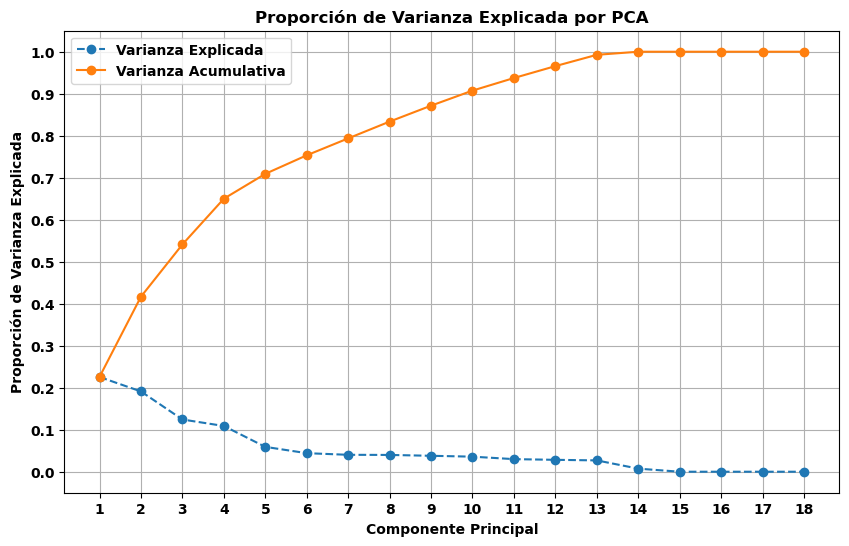

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(df_varianza.index , df_varianza['Proporción de Varianza Explicada'], marker='o', linestyle='--', label='Varianza Explicada')
plt.plot(df_varianza.index, df_varianza['Varianza Explicada Acumulativa'], marker='o', linestyle='-', label='Varianza Acumulativa')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Proporción de Varianza Explicada por PCA')
plt.legend()
plt.grid(True)
# Establecer los ticks del eje x desde 1 hasta la longitud de df_varianza 
plt.xticks(ticks=range(1, len(df_varianza) + 1))
plt.yticks(ticks=[i/10 for i in range(0, 11)])
plt.show()

##### Análisis de la gráfica
* En la gráfica, el eje x muestra los PC cada número indica un PC.
* En el eje y se muestra la proporción de varianza explicada, donde el 1 representa el 100%
* La linea azul indica la proporción de la varianza explicada por cada PC de manera individual.
* La línea Naranja indica la proporción de la varianza acumulada.
* En este caso se puede ver que para explicar un 70% de la varianza se requieren cinco PC y para explicar el 100% se requieren hasta trece PC

#### Diseñar el gráfico de loadings para las componentes principales e interprete los resultados.

En el contexto del Análisis de Componentes Principales (PCA), los loadings (o cargas en español) se refieren a los coeficientes que representan la relación entre las variables originales y los componentes principales. Los loadings indican cuánto contribuye cada variable original a un componente principal específico.

In [50]:
# Transponer para obtener los loadings
loadings = pca.components_.T 
loadings.shape

(18, 18)

In [51]:
# Obtener los loadings
loading_df = pd.DataFrame(loadings, # datos que se van a convertir en dataframe
                          columns=[f'PC{i+1}' for i in range(pca.n_components_)], # cada PC se va asignando com una columna en el dataframe
                          index=datos_final.columns) # se toman los nombres de las variables como índice de cada fila
loading_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Location_Category_Rural,0.012217,-0.040393,0.023302,-0.027211,-0.040946,0.036171,-0.451273,-0.051682,0.566244,-0.352495,0.064545,0.043975,-0.057567,0.000124,5.771394e-01,1.286578e-02,2.355730e-03,-8.503614e-03
Location_Category_Suburban,0.001989,0.027495,-0.016531,0.006502,0.032928,0.031587,-0.021039,-0.544030,-0.368612,0.459357,0.116012,-0.054822,0.061162,-0.003053,5.771394e-01,1.286578e-02,2.355730e-03,-8.503614e-03
Location_Category_Urban,-0.014206,0.012898,-0.006771,0.020709,0.008018,-0.067758,0.472312,0.595712,-0.197631,-0.106861,-0.180557,0.010847,-0.003595,0.002928,5.771394e-01,1.286578e-02,2.355730e-03,-8.503614e-03
Customer_Loyalty_Status_Gold,0.008276,-0.020537,-0.009341,-0.050903,0.023002,-0.064021,-0.288711,0.378245,0.194136,0.607706,-0.067612,-0.121837,-0.076883,0.011137,-1.281337e-02,5.733712e-01,6.455135e-02,1.573833e-02
Customer_Loyalty_Status_Regular,0.008635,0.042583,-0.005678,-0.000391,-0.069348,-0.217226,-0.276639,-0.019847,-0.523466,-0.473239,0.149783,0.104992,0.066029,-0.006108,-1.281337e-02,5.733712e-01,6.455135e-02,1.573833e-02
Customer_Loyalty_Status_Silver,-0.016911,-0.022046,0.015019,0.051295,0.046346,0.281248,0.565351,-0.358399,0.329330,-0.134468,-0.082171,0.016844,0.010854,-0.005029,-1.281337e-02,5.733712e-01,6.455135e-02,1.573833e-02
Time_of_Booking_Afternoon,0.006295,-0.002450,0.045426,-0.013887,0.020184,-0.085568,-0.009864,-0.098449,-0.075342,-0.143862,-0.185755,-0.676500,-0.459674,-0.018699,-1.857863e-03,-5.349872e-02,4.920704e-01,-7.071858e-02
Time_of_Booking_Evening,-0.005945,0.003101,-0.023357,-0.000590,-0.067570,-0.015199,-0.066534,0.005629,0.062347,-0.003835,-0.240541,-0.125649,0.813531,0.027770,-1.857863e-03,-5.349872e-02,4.920704e-01,-7.071858e-02
Time_of_Booking_Morning,0.005837,-0.009309,0.009183,0.006417,0.018919,0.010466,-0.074636,-0.075231,-0.054782,0.084938,-0.389964,0.690477,-0.314553,-0.008204,-1.857863e-03,-5.349872e-02,4.920704e-01,-7.071858e-02
Time_of_Booking_Night,-0.006187,0.008658,-0.031251,0.008060,0.028467,0.090301,0.151034,0.168051,0.067777,0.062759,0.816260,0.111672,-0.039304,-0.000867,-1.857863e-03,-5.349872e-02,4.920704e-01,-7.071858e-02


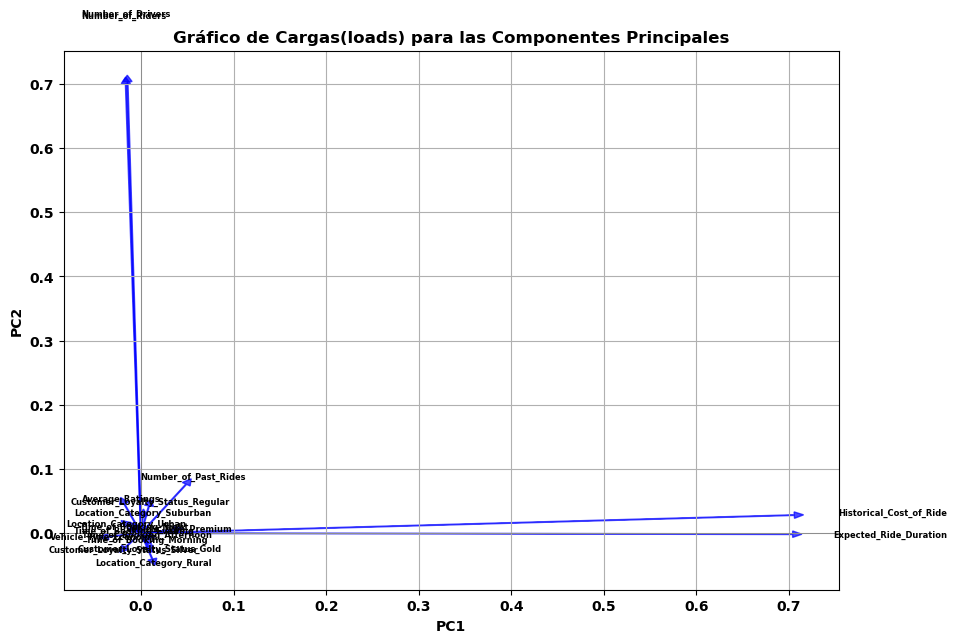

In [52]:
# Crear el gráfico de cargas
plt.figure(figsize=(10, 7))
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)

# Parámetros ajustables
arrow_scale = 0.01  # Ajusta el tamaño de la punta de la flecha
text_scale = 6     # Ajusta el tamaño de la letra
PC_x = 'PC1' # establecer el PC que se va mostrar en el eje x de la gráfica
PC_y = 'PC2' # establecer el PC que se va mostrar en el eje y de la gráfica

# Dibujar las cargas como flechas
for i in range(loading_df.shape[0]):
    plt.arrow(0, 0, loading_df[PC_x][i], loading_df[PC_y][i],
              color='b', alpha=0.7, head_width=arrow_scale, head_length=arrow_scale)
    plt.text(loading_df[PC_x][i] * 1.15, loading_df[PC_y][i] * 1.15,
             loading_df.index[i], color='black', ha='center', va='center', fontsize=text_scale)

# Añadir etiquetas y título
plt.xlabel(PC_x)
plt.ylabel(PC_y)
plt.title("Gráfico de Cargas(loads) para las Componentes Principales")
plt.grid()
plt.show()

#### Análisis de la gráfica
Este gráfico es útil para entender qué variables están contribuyendo más a cada componente principal. La interpretación es la siguiente:
* Dirección y longitud de las flechas: Una flecha más larga indica que la variable tiene una contribución alta a ese componente principal.
* Ángulo entre flechas: Variables cuyos vectores están cercanos en dirección tienen una relación positiva entre sí, mientras que los vectores en direcciones opuestas sugieren una relación negativa.
* Ejes principales (PC1 y PC2): Estos ejes representan las componentes principales, y su interpretación depende de las variables que tienen altas cargas en cada componente
* Si dos variables tienen cargas similares en PC1, significa que están correlacionadas y que esta componente principal está capturando esa relación.
* Si una variable tiene una carga alta en PC1 y otra en PC2, ambas contribuyen de manera importante pero en direcciones diferentes, lo que significa que explican diferentes partes de la varianza.

#### Extraer conclusiones del PCA.

* PCA es una técnica utilizada para la reducción de la dimensionalidad de un conjunto de datos.
* Permite comprimir el conjunto de datos mientras minimiza la pérdida de información, facilitando el analisis y visualizacion de los datos y mejorar del rendimiento de los algoritmos de aprendizaje automático.
* Los componentes principales capturan diferentes proporciones de la varianza total de los datos. Al observar la varianza explicada por cada componente, se puede determinar cuántos componentes son necesarios para explicar una cantidad significativa de la variabilidad.
* PCA transforma las variables originales en componentes principales que son ortogonales entre sí (no correlacionadas). Esto resuelve problemas de colinealidad que pueden afectar negativamente a los modelos estadísticos y de aprendizaje automático.
* Los primeros componentes principales pueden ser utilizados para crear representaciones visuales bidimensionales o tridimensionales de los datos. Esto facilita la detección de grupos, tendencias y anormalidades dentro de los datos.
* Para seleccionar las variables después de aplicar el PCA:
  * Seleccionar los Componentes Principales Relevantes, es decir los que mas aporten en la proporciones de la varianza acumulada.
  * Revisar las cargas de cada variable en los componentes seleccionados. Una carga alta indica que esa variable está muy asociada con el componente. si una variable tiene cargas bajas en los componentes seleccionados, su contribución a la variabilidad es menor, por lo que podrías excluirla del análisis.

### 2) Agrupamiento K - Medias.

* Implementar el algoritmo de clúster K-means con cuatro segmentos.
* Calcular el tamaño del clúster mediante una tabla de frecuencias, analice los pesos porcentuales.
* Realizar la visualización del clúster, interprete el gráfico.
* Calcular las medidas de resumen de cada clúster y detectar diferencias entre cada segmento, hacer la interpretación de los resultados.
* Extraer conclusiones del K-Means.  

#### Implementar el algoritmo de clúster K-means con cuatro segmentos.

In [59]:
from sklearn.cluster import KMeans

In [60]:
# Tomar el conjunto de datos que está codificado y estandarizado
#datos_final = pd.concat([df_codificado, datos.drop(columns=categoricas)], axis=1)
#datos_final

In [61]:
# Aquí seleccionamos 4 clusters 
k = 4
kmeans = KMeans(n_clusters=k, random_state=42) 
# Entrenar el modelo
clusters = kmeans.fit_predict(datos_final) 

In [62]:
# Añadir las etiquetas de los clusters al DataFrame
datos_final['Cluster'] = clusters
datos_final

,Location_Category_Rural,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Gold,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Afternoon,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Economy,Vehicle_Type_Premium,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride,Cluster
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.250673,0.940457,-1.263895,0.488517,-0.195113,-0.471736,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.100128,0.625642,0.749818,-0.452793,-1.151547,-1.061811,3
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.775528,0.205889,-1.707594,-0.613505,-0.480008,-0.228301,1
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.208460,0.048482,0.579164,0.121177,0.700273,0.522270,2
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.744122,-0.266334,0.818079,-1.118598,1.005518,1.107522,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.155441,-0.213864,-0.888457,-0.108411,-1.802736,-1.502755,1
996,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.997398,0.100951,1.432432,0.672188,-0.113714,0.276125,3
997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.691103,-1.105840,1.022864,-0.292082,-1.212596,-1.150069,3
998,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.311191,-0.003988,0.954602,-1.440022,-0.846302,-0.499332,3


##### Método del codo
Permite calcular el número óptimo de clústeres

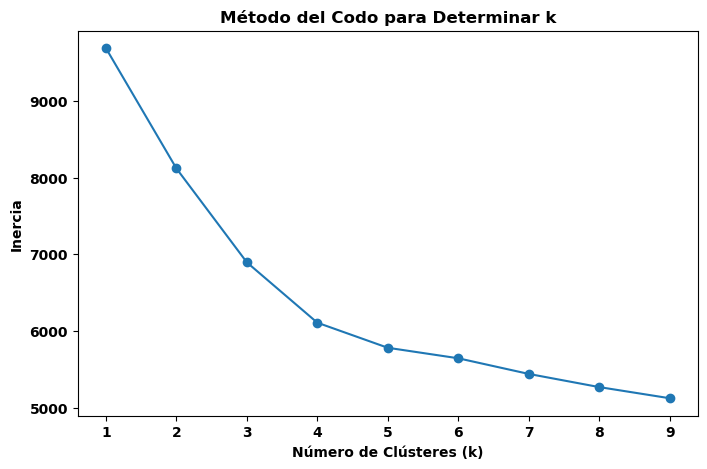

In [64]:
# Método del codo
inertia = []
k_range = range(1, 10)  # Prueba valores de k de 1 a 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_final)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar k')
plt.show()

#### Calcular el tamaño del clúster mediante una tabla de frecuencias, analice los pesos porcentuales.

In [66]:
# Calcular la tabla de frecuencias de los clústeres
frec_cluster = datos_final['Cluster'].value_counts().sort_index()
frec_cluster

Cluster
0    208
1    222
2    345
3    225
Name: count, dtype: int64

In [67]:
# Calcular el tamaño total 
tam_total = len(datos_final)

In [68]:
# Calcular los porcentajes 
prct_cluster = (frec_cluster / tam_total) * 100 
prct_cluster

Cluster
0    20.8
1    22.2
2    34.5
3    22.5
Name: count, dtype: float64

In [69]:
tb_prct_cl = pd.DataFrame({
    'Frecuencia clúster': frec_cluster,
    'Porcentaje clúster': prct_cluster
})
tb_prct_cl

,Frecuencia clúster,Porcentaje clúster
Cluster,,
0,208,20.8
1,222,22.2
2,345,34.5
3,225,22.5


Análisis
* Frecuencia: Muestra el número de elementos en cada clúster.
* Porcentaje: Indica el peso relativo de cada clúster en el conjunto de datos total. 
* Este análisis permite entender la distribución de los datos entre los diferentes clústeres. Un clúster con un porcentaje alto indica una mayor concentración de datos, mientras que un clúster con un porcentaje bajo sugiere una menor concentración.

#### Realizar la visualización del clúster, interprete el gráfico.

##### Gráfico de los clústeres
Para poder graficar los clústeres, se aplica PCA para reducir el conjunto de datos a dos dimensiones y poder graficar en un plano 2D.

In [73]:
pca = PCA(n_components=2)
datos_pca = pca.fit_transform(datos_final.drop(columns=['Cluster']))

In [74]:
# Obtener los centros de los clústeres en el espacio reducido
centros_pca = pca.transform(kmeans.cluster_centers_[:, :18]) # asegurarse que solo tome 18 columnas

C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [75]:
# Convertir los datos reducidos a un DataFrame y agregar la columna de clúster
pca_df = pd.DataFrame(datos_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = datos_final['Cluster']

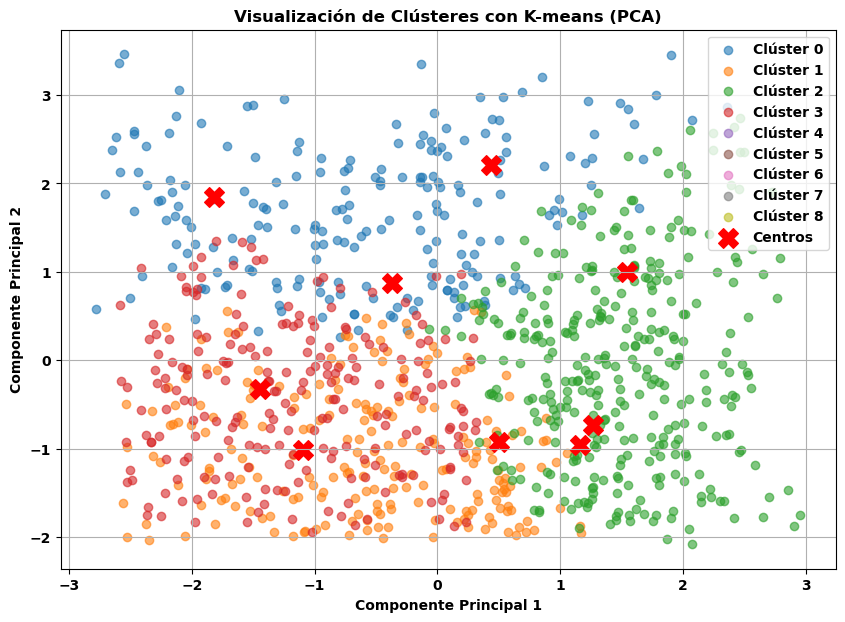

In [76]:
# Graficar los clústeres
plt.figure(figsize=(10, 7))
for cluster in range(k):
    clustered_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(clustered_data['PC1'], 
                clustered_data['PC2'], 
                label=f'Clúster {cluster}', alpha=0.6)

# Graficar los centros de los clústeres
plt.scatter(centros_pca[:, 0], centros_pca[:, 1], s=200, c='red', marker='X', label='Centros')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clústeres con K-means (PCA)')
plt.legend()
plt.grid()
plt.show()

Análisis
* Los puntos marcados con una "X" en rojo representan los centros de cada clúster en el espacio reducido, lo cual facilita la visualización de cómo los datos se agrupan alrededor de estos puntos centrales.
* Como no se realizó una prueba para deteminar la cantidad óptima de clústeres, se evidencia que los clústeres 1 y 3 se mezclan, lo que sugiere una agrupación inadecuada para los datos que cumplen estas características.

#### Calcular las medidas de resumen de cada clúster y detectar diferencias entre cada segmento, hacer la interpretación de los resultados.

In [79]:
# Calcular las medidas de resumen para cada clúster
resumen_clusters = datos_final.groupby('Cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Mostrar las primeras filas del resumen
resumen_clusters.head()


Location_Category_Rural                             \
                           mean median       std  min  max   
Cluster                                                      
0                      0.259615    0.0  0.439481  0.0  1.0   
1                      0.382883    0.0  0.487189  0.0  1.0   
2                      0.333333    0.0  0.472089  0.0  1.0   
3                      0.346667    0.0  0.476970  0.0  1.0   

        Location_Category_Suburban                             ...  \
                              mean median       std  min  max  ...   
Cluster                                                        ...   
0                         0.341346    0.0  0.475305  0.0  1.0  ...   
1                         0.279279    0.0  0.449659  0.0  1.0  ...   
2                         0.344928    0.0  0.476035  0.0  1.0  ...   
3                         0.311111    0.0  0.463980  0.0  1.0  ...   

        Expected_Ride_Duration                                          \
                          mean    median       std       min       max   
Cluster                                                                  
0                    -0.383543 -0.296861  0.823790 -1.823086  1.575308   
1                    -0.375235 -0.296861  0.720099 -1.823086  0.985168   
2                     1.038903  1.066567  0.392035 -0.011966  1.636357   
3                    -0.868189 -0.948050  0.627640 -1.823086  0.578175   

        Historical_Cost_of_Ride                                          
                           mean    median       std       min       max  
Cluster                                                                  
0                     -0.353963 -0.350835  0.814039 -1.852345  2.086865  
1                     -0.414325 -0.388222  0.621024 -1.798851  0.842736  
2                      1.036884  0.974978  0.579958 -0.326160  2.478355  
3                     -0.853868 -0.850289  0.529305 -1.823646  0.285841  

[4 rows x 90 columns]

In [80]:
resumen_clusters.T

Cluster                                0         1         2         3
Location_Category_Rural mean    0.259615  0.382883  0.333333  0.346667
                        median  0.000000  0.000000  0.000000  0.000000
                        std     0.439481  0.487189  0.472089  0.476970
                        min     0.000000  0.000000  0.000000  0.000000
                        max     1.000000  1.000000  1.000000  1.000000
...                                  ...       ...       ...       ...
Historical_Cost_of_Ride mean   -0.353963 -0.414325  1.036884 -0.853868
                        median -0.350835 -0.388222  0.974978 -0.850289
                        std     0.814039  0.621024  0.579958  0.529305
                        min    -1.852345 -1.798851 -0.326160 -1.823646
                        max     2.086865  0.842736  2.478355  0.285841

[90 rows x 4 columns]

In [81]:
# Seleccionar algunas variables clave para la visualización
variables_clave = datos_final.columns
variables_clave = variables_clave.drop('Cluster')
variables_clave

Index(['Location_Category_Rural', 'Location_Category_Suburban',
       'Location_Category_Urban', 'Customer_Loyalty_Status_Gold',
       'Customer_Loyalty_Status_Regular', 'Customer_Loyalty_Status_Silver',
       'Time_of_Booking_Afternoon', 'Time_of_Booking_Evening',
       'Time_of_Booking_Morning', 'Time_of_Booking_Night',
       'Vehicle_Type_Economy', 'Vehicle_Type_Premium', 'Number_of_Riders',
       'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings',
       'Expected_Ride_Duration', 'Historical_Cost_of_Ride'],
      dtype='object')

In [82]:
# Calcular las medias por clúster
medias_clusters = datos_final.groupby('Cluster').mean()
medias_clusters

,Location_Category_Rural,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Gold,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Afternoon,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Economy,Vehicle_Type_Premium,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
Cluster,,,,,,,,,,,,,,,,,,
0,0.259615,0.341346,0.399038,0.317308,0.394231,0.288462,0.264423,0.206731,0.254808,0.274038,0.504808,0.495192,1.059702,1.361724,-0.270166,0.103516,-0.383543,-0.353963
1,0.382883,0.279279,0.337838,0.319820,0.252252,0.427928,0.270270,0.243243,0.193694,0.292793,0.500000,0.500000,-0.680645,-0.636690,-0.897220,0.175988,-0.375235,-0.414325
2,0.333333,0.344928,0.321739,0.327536,0.315942,0.356522,0.255072,0.231884,0.266667,0.246377,0.437681,0.562319,-0.018395,-0.157137,0.195911,-0.049384,1.038903,1.036884
3,0.346667,0.311111,0.342222,0.280000,0.324444,0.395556,0.195556,0.240000,0.257778,0.306667,0.493333,0.506667,-0.279860,-0.389694,0.834614,-0.193614,-0.868189,-0.853868


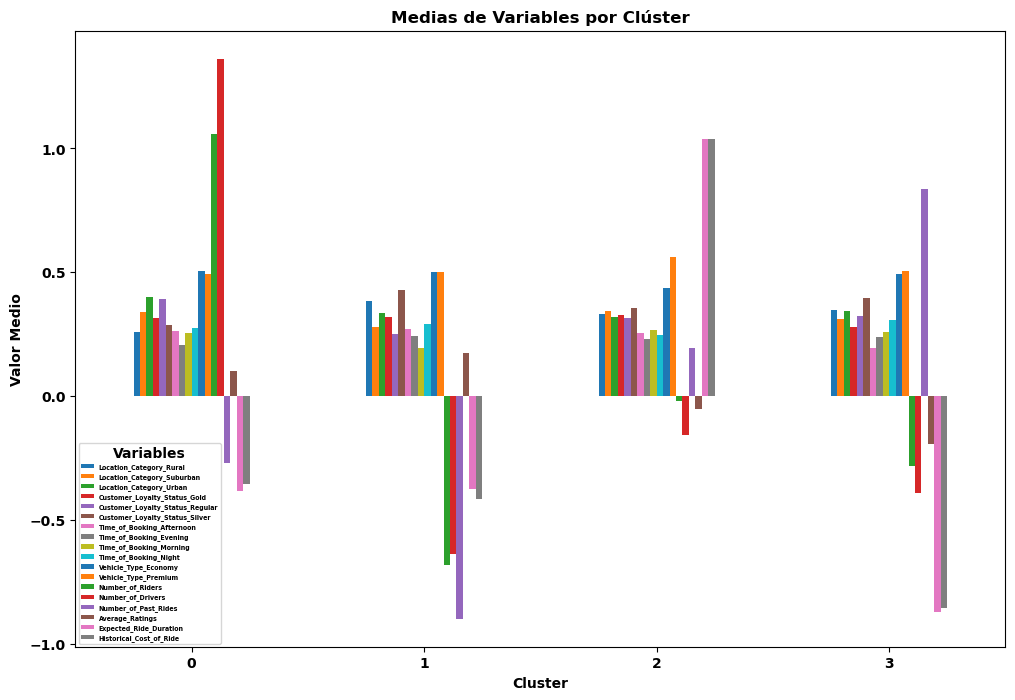

In [83]:
# Graficar las medias
medias_clusters[variables_clave].plot(kind='bar', figsize=(12, 8))
plt.title('Medias de Variables por Clúster')
plt.ylabel('Valor Medio')
plt.xticks(rotation=0)
plt.legend(title='Variables', fontsize=4.5)
plt.show()

#### Extraer conclusiones del K-Means.

* El algoritmo K-means puede identificar grupos naturales en los datos. Esto es útil para segmentar clientes, identificar patrones en datos. Cada clúster puede representar un segmento distinto con características comunes.
* Los centroides de los clústeres representan el punto medio de cada grupo. Estos centroides pueden ser utilizados como representaciones típicas de los grupos, lo cual es útil para resumir las características de cada clúster y para nuevos datos que necesiten ser asignados a un clúster existente.
* El tamaño de cada clúster (número de puntos) puede variar. Un clúster grande indica una alta concentración de datos, mientras que un clúster pequeño puede indicar outliers o una segmentación más específica.
* Distancias Intra-clúster: La distancia promedio de los puntos al centroide de su clúster puede indicar la compactación del clúster. Clústeres más compactos (con distancias más pequeñas) son más homogéneos, lo que sugiere que los miembros del clúster son muy similares entre sí.
* Distancias Inter-clúster: La distancia entre los centroides de diferentes clústeres indica cuán separados están los clústeres entre sí. Clústeres bien separados son indicativos de grupos claramente distintos, lo cual es deseable en muchos contextos analíticos.
* Segmentación de Clientes: Permite agrupar clientes en segmentos basados en comportamientos o características similares, facilitando estrategias de marketing personalizadas.
* Detección de Anomalías: Puede identificar datos atípicos que no pertenecen claramente a ningún clúster, indicando posibles anomalías.
* Se recomienda utilizar métodos para evaluar la cantidad óptima de clústeres y así evitar que hayan clústeres muy similares lo que no permita una adecuada segmentación de los clientes.

### 3) Agrupamiento Jerárquico

* Implementar el método de clúster Hierarchical clustering.
* Realizar el dendongrama e interpretar.
* Calcular el tamaño del clúster mediante una tabla de frecuencias, analice los pesos porcentuales
* Calcular las medidas de resumen de cada clúster y detectar diferencias entre cada segmento, hacer la interpretación de los resultados.
* Extraer conclusiones del Hierarchical clustering.

#### Implementar el método de clúster Hierarchical clustering.

hierarquical clustering  
El clustering jerárquico es una técnica de análisis de datos que agrupa objetos en clústeres basándose en una jerarquía preestablecida. Este método se diferencia de K-means en que no requiere especificar de antemano el número de clústeres, sino que crea una estructura en forma de árbol (dendrograma) que muestra las relaciones jerárquicas entre los datos.

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

In [91]:
# Eliminar la columna 'Cluster' de datos_final
datos_final_hc = datos_final.drop('Cluster', axis=1)
datos_final_hc.columns

Index(['Location_Category_Rural', 'Location_Category_Suburban',
       'Location_Category_Urban', 'Customer_Loyalty_Status_Gold',
       'Customer_Loyalty_Status_Regular', 'Customer_Loyalty_Status_Silver',
       'Time_of_Booking_Afternoon', 'Time_of_Booking_Evening',
       'Time_of_Booking_Morning', 'Time_of_Booking_Night',
       'Vehicle_Type_Economy', 'Vehicle_Type_Premium', 'Number_of_Riders',
       'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings',
       'Expected_Ride_Duration', 'Historical_Cost_of_Ride'],
      dtype='object')

##### Aplicar el clustering jerárquico usando AgglomerativeClustering

In [105]:
from sklearn.cluster import AgglomerativeClustering

In [106]:
clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
clustering.fit(datos_final_hc)

AgglomerativeClustering(n_clusters=4)

In [107]:
# Agregar las etiquetas de los clústeres al DataFrame original
datos_final_hc['Cluster'] = clustering.labels_

In [108]:
datos_final_hc.columns

Index(['Location_Category_Rural', 'Location_Category_Suburban',
       'Location_Category_Urban', 'Customer_Loyalty_Status_Gold',
       'Customer_Loyalty_Status_Regular', 'Customer_Loyalty_Status_Silver',
       'Time_of_Booking_Afternoon', 'Time_of_Booking_Evening',
       'Time_of_Booking_Morning', 'Time_of_Booking_Night',
       'Vehicle_Type_Economy', 'Vehicle_Type_Premium', 'Number_of_Riders',
       'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings',
       'Expected_Ride_Duration', 'Historical_Cost_of_Ride', 'Cluster'],
      dtype='object')

#### Realizar el dendongrama e interpretar.

##### Visualizar el dendrograma 

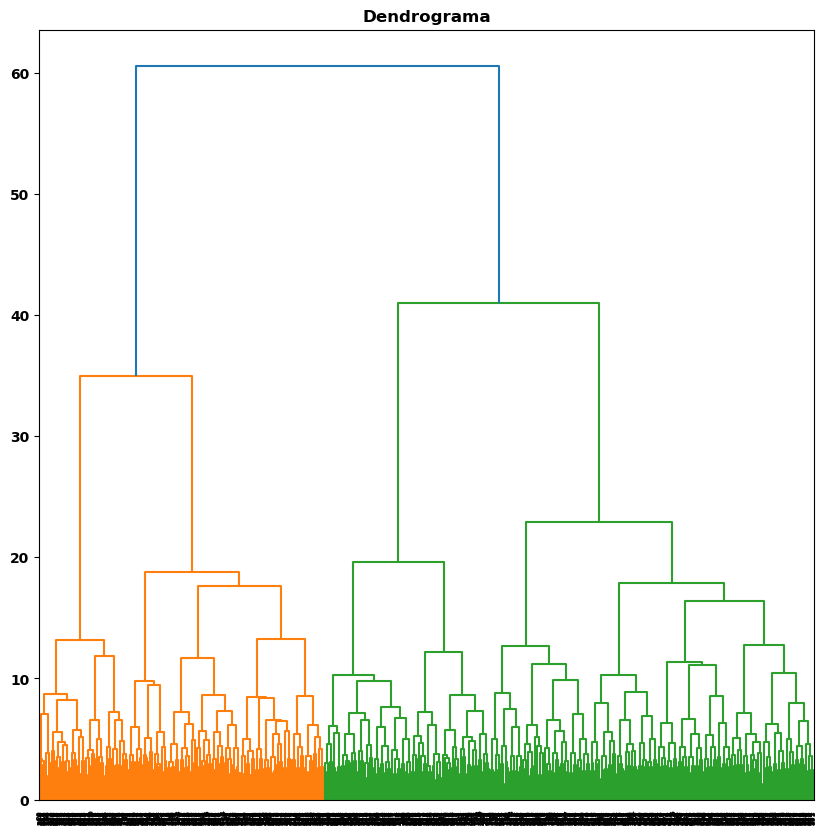

In [111]:
# (útil para elegir el número de clústeres)
plt.figure(figsize=(10, 10))
sch.dendrogram(sch.linkage(datos_final_hc, method='ward'))
plt.title("Dendrograma")
plt.show()

#### Calcular el tamaño del clúster mediante una tabla de frecuencias, analice los pesos porcentuales

In [113]:
frec_cls_hc = datos_final_hc['Cluster'].value_counts().sort_index()
frec_cls_hc

Cluster
0    418
1    214
2    253
3    115
Name: count, dtype: int64

In [114]:
# Calcular el tamaño total
tam_total = len(datos_final_hc)

# Calcular los porcentajes
porc_cls_hc = (frec_cls_hc / tam_total) * 100
print(porc_cls_hc)


Cluster
0    41.8
1    21.4
2    25.3
3    11.5
Name: count, dtype: float64


In [115]:
tb_prct_hc = pd.DataFrame({
    'Frecuencia clúster': frec_cls_hc,
    'Porcentaje clúster': porc_cls_hc
})
tb_prct_hc

,Frecuencia clúster,Porcentaje clúster
Cluster,,
0,418,41.8
1,214,21.4
2,253,25.3
3,115,11.5


#### Calcular las medidas de resumen de cada clúster y detectar diferencias entre cada segmento, hacer la interpretación de los resultados.

In [117]:
# Calcular las medidas de resumen para cada clúster
resumen_clusters_hc = datos_final_hc.groupby('Cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Mostrar las primeras filas del resumen
resumen_clusters_hc.head()


Location_Category_Rural                             \
                           mean median       std  min  max   
Cluster                                                      
0                      0.358852    0.0  0.480238  0.0  1.0   
1                      0.308411    0.0  0.462920  0.0  1.0   
2                      0.332016    0.0  0.471870  0.0  1.0   
3                      0.278261    0.0  0.450104  0.0  1.0   

        Location_Category_Suburban                             ...  \
                              mean median       std  min  max  ...   
Cluster                                                        ...   
0                         0.311005    0.0  0.463459  0.0  1.0  ...   
1                         0.378505    0.0  0.486152  0.0  1.0  ...   
2                         0.316206    0.0  0.465916  0.0  1.0  ...   
3                         0.269565    0.0  0.445676  0.0  1.0  ...   

        Expected_Ride_Duration                                          \
                          mean    median       std       min       max   
Cluster                                                                  
0                    -0.727417 -0.785253  0.708771 -1.823086  1.331112   
1                     0.683346  0.781671  0.642040 -1.110847  1.636357   
2                     0.918891  0.985168  0.494704 -0.785253  1.636357   
3                    -0.649176 -0.561407  0.712342 -1.823086  0.842720   

        Historical_Cost_of_Ride                                          
                           mean    median       std       min       max  
Cluster                                                                  
0                     -0.709088 -0.738691  0.623547 -1.823646  1.028674  
1                      0.628864  0.608473  0.771342 -0.914151  2.478355  
2                      0.917978  0.920001  0.630990 -0.970377  2.362369  
3                     -0.612406 -0.609829  0.723493 -1.852345  1.573364  

[4 rows x 90 columns]

In [118]:
resumen_clusters_hc.T

Cluster                                0         1         2         3
Location_Category_Rural mean    0.358852  0.308411  0.332016  0.278261
                        median  0.000000  0.000000  0.000000  0.000000
                        std     0.480238  0.462920  0.471870  0.450104
                        min     0.000000  0.000000  0.000000  0.000000
                        max     1.000000  1.000000  1.000000  1.000000
...                                  ...       ...       ...       ...
Historical_Cost_of_Ride mean   -0.709088  0.628864  0.917978 -0.612406
                        median -0.738691  0.608473  0.920001 -0.609829
                        std     0.623547  0.771342  0.630990  0.723493
                        min    -1.823646 -0.914151 -0.970377 -1.852345
                        max     1.028674  2.478355  2.362369  1.573364

[90 rows x 4 columns]

In [119]:
# Promediar las estadísticas por cada clúster en todas las variables
resumen_general_clusters = resumen_clusters_hc.mean(axis=1)
resumen_general_clusters

Cluster
0    0.260125
1    0.289175
2    0.425200
3    0.351016
dtype: float64

In [120]:
# Analizar las características de cada clúster
cluster_summary = datos_final_hc.groupby('Cluster').mean()  # Para variables numéricas
cluster_summary.T

Cluster,0,1,2,3
Location_Category_Rural,0.358852,0.308411,0.332016,0.278261
Location_Category_Suburban,0.311005,0.378505,0.316206,0.269565
Location_Category_Urban,0.330144,0.313084,0.351779,0.452174
Customer_Loyalty_Status_Gold,0.279904,0.317757,0.363636,0.313043
Customer_Loyalty_Status_Regular,0.291866,0.285047,0.328063,0.469565
Customer_Loyalty_Status_Silver,0.428230,0.397196,0.308300,0.217391
Time_of_Booking_Afternoon,0.198565,0.345794,0.252964,0.226087
Time_of_Booking_Evening,0.263158,0.144860,0.256917,0.217391
Time_of_Booking_Morning,0.253589,0.252336,0.241107,0.217391
Time_of_Booking_Night,0.284689,0.257009,0.249012,0.339130


#### Extraer conclusiones del Hierarchical clustering.

* Clúster Balanceado: Si los clústeres tienen tamaños similares, puede indicar que los datos están distribuidos de manera bastante uniforme entre los clústeres.
* Desbalance en Clústeres: Si uno o más clústeres son significativamente más grandes o más pequeños, puede ser una indicación de que hay agrupamientos dominantes o datos atípicos.
* El dendrograma revela cómo los clústeres se forman de manera jerárquica. Esto permite observar la relación entre los grupos y subgrupos en diferentes niveles de la jerarquía, ayudando a entender la estructura interna de los datos.
* Al examinar el dendrograma, se puede determinar visualmente el número óptimo de clústeres cortando el dendrograma a diferentes alturas. Esto es útil para identificar el punto donde la combinación de clústeres ya no es significativa y se debe parar.
* El clustering jerárquico muestra qué puntos de datos están más relacionados entre sí en función de su proximidad. Esto ayuda a entender qué datos son similares y forman clústeres en los primeros niveles de la jerarquía.
* El dendrograma es una herramienta visual clave en el clustering jerárquico. Al cortar el dendrograma en diferentes alturas, se puede explorar la estructura jerárquica y determinar el número óptimo de clústeres.